In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import glob
import sys
import pandasql as pdsql
import importlib
from brokenaxes import brokenaxes

sys.path.append("..")
import analysislib as alib
importlib.reload(alib)

# ABOVE ZNONEOFTHE

sq = lambda q: pdsql.sqldf(q, globals())
sqflat = lambda q: alib.flatten(pdsql.sqldf(q, globals()).values.tolist())

plt.rcParams.update({'font.size': 14, 'legend.fontsize': 12})

In [3]:
df_aha = pd.read_csv("../../data/2025-10-21-time-17-01-56-jvmheap-compression/zram_consolidated.csv")

In [4]:
df_aha.columns

Index(['benchmark', 'device', 'AVG_COMPR_SIZE_MB', 'AVG_DATA_SIZE_MB',
       'AVG_HUGE_PAGES', 'AVG_INCOMPRESSIBLE_DATA_MB', 'AVG_RATIO',
       'AVG_SAME_PAGES', 'HUGE_PAGES_AT_MAX_DATA_SIZE',
       'INITIAL_ENTRIES_SKIPPED', 'MAX_COMPR_SIZE_MB', 'MAX_DATA_SIZE_MB',
       'MAX_HUGE_PAGES', 'MAX_SAME_PAGES', 'RATIO_AT_MAX_DATA_SIZE',
       'RATIO_STDDEV', 'SAME_PAGES_AT_MAX_DATA_SIZE',
       'STARTUP_ENTRIES_SKIPPED'],
      dtype='object')

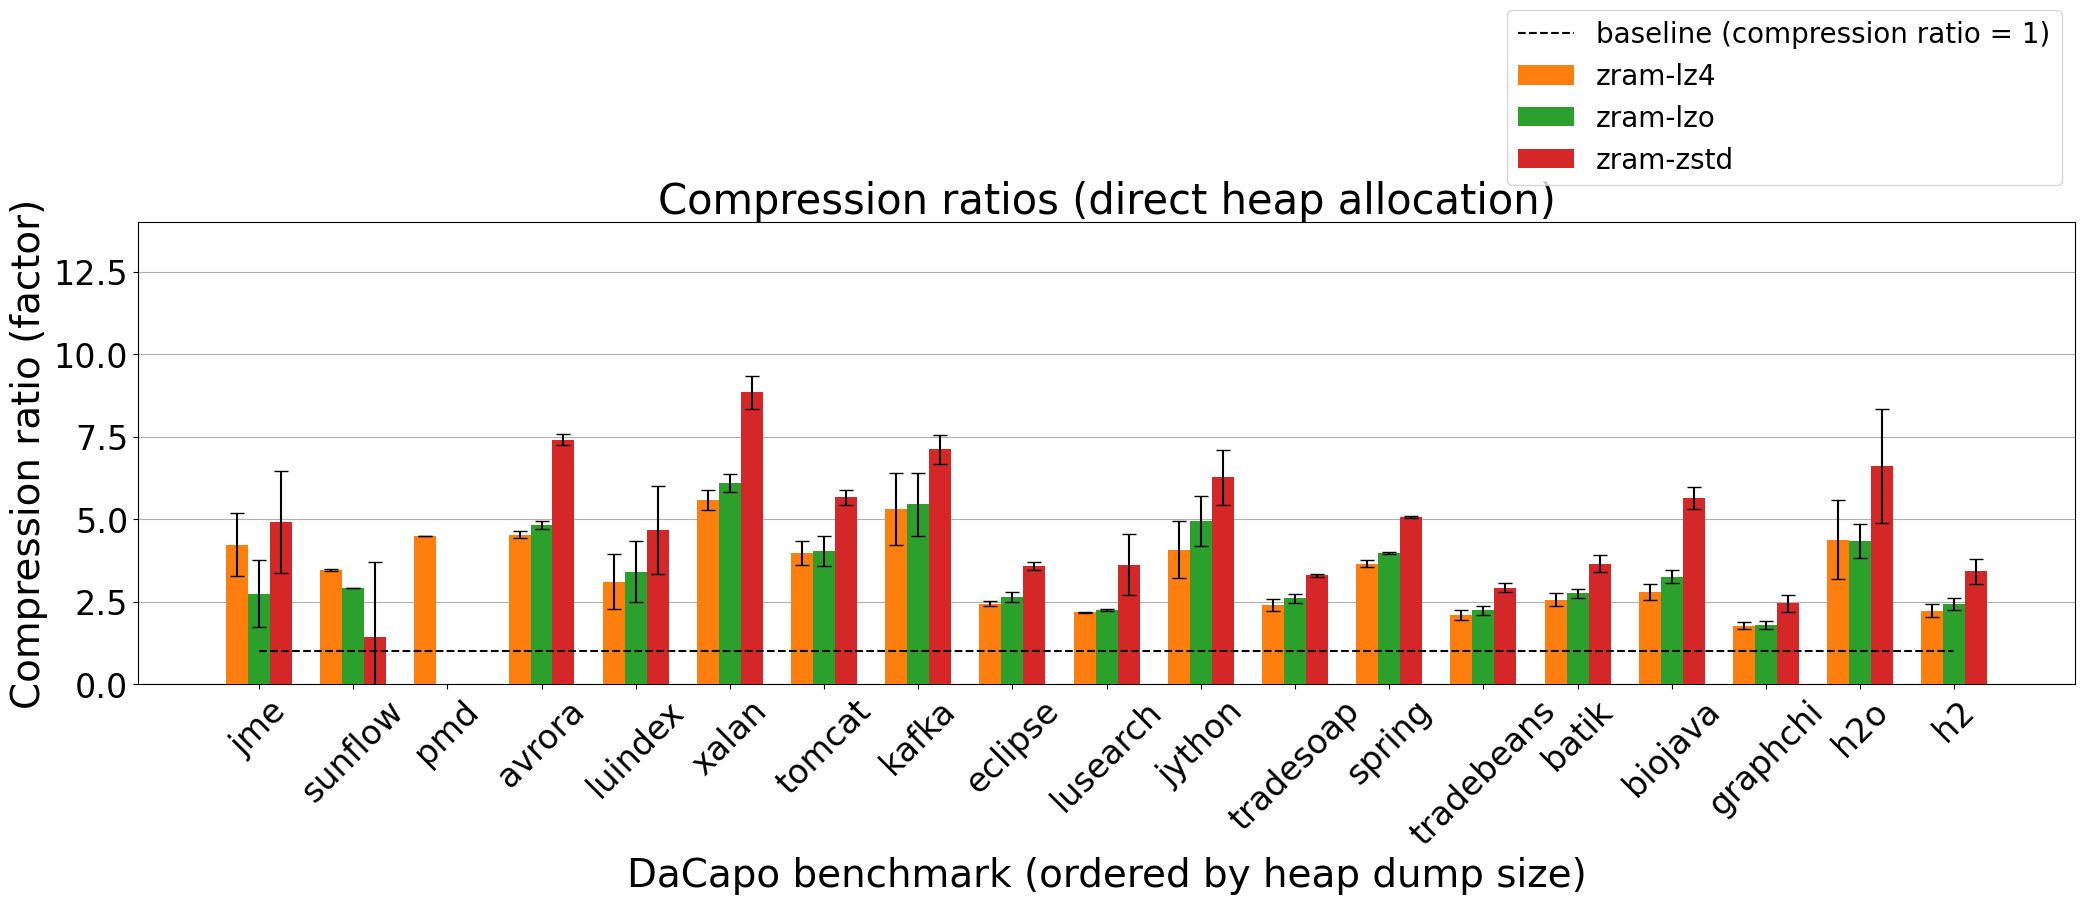

In [14]:
# Get benchmarks ordered by their average data size
benchmarks_ordered = sqflat("""
    SELECT benchmark 
    FROM df_aha 
    GROUP BY benchmark 
    ORDER BY AVG(AVG_DATA_SIZE_MB)
""")

alib.grouped_barplot(
    df=df_aha,
    grouping_col="device",
    config_col="benchmark", 
    value_col="AVG_RATIO",
    error_col="RATIO_STDDEV",
    config_order=benchmarks_ordered, 
    grouping_order=["zram2", "zram0", "zram1"], 
    figsize=[25, 6],
    labels=["zram-lz4", "zram-lzo", "zram-zstd"],
    xlabel="DaCapo benchmark (ordered by heap dump size)",
    ylabel="Compression ratio (factor)",
    colors=["#ff7f0e", "#2ca02c", "#d62728"],
    show=False
)

nb = len(benchmarks_ordered)
plt.plot(range(nb), np.ones(nb), linestyle='--', zorder=100, color="#000000", label="baseline (compression ratio = 1)") # draw a line at 1 for baseline purposes

plt.ylim([0, 14])

plt.gca().get_yaxis().label.set_fontsize(28)
plt.gca().get_xaxis().label.set_fontsize(28)
plt.gca().tick_params(axis='x', labelsize=24)
plt.gca().tick_params(axis='y', labelsize=24)
plt.xticks(rotation=45)

plt.legend(fontsize=20, bbox_to_anchor=(1, 1.05), loc="lower right")

plt.savefig("../../processed-data/2025-10-22-dumps-final/compratios-allocateheapat.png", bbox_inches="tight")
plt.title("Compression ratios (direct heap allocation)")
plt.gca().title.set_fontsize(30)
plt.savefig("../../processed-data/2025-10-22-dumps-final/compratios-allocateheapat-w-title.png", bbox_inches="tight")
plt.show()

In [38]:
print(sq("SELECT device, benchmark, AVG_RATIO FROM df_aha ORDER BY device, benchmark"))

   device   benchmark  AVG_RATIO
0   zram0      avrora       4.83
1   zram0       batik       2.76
2   zram0     biojava       3.26
3   zram0     eclipse       2.64
4   zram0    graphchi       1.81
5   zram0          h2       2.43
6   zram0         h2o       4.35
7   zram0         jme       2.75
8   zram0      jython       4.96
9   zram0       kafka       5.46
10  zram0     luindex       3.41
11  zram0    lusearch       2.26
12  zram0         pmd        NaN
13  zram0      spring       3.97
14  zram0     sunflow       2.93
15  zram0      tomcat       4.05
16  zram0  tradebeans       2.25
17  zram0   tradesoap       2.61
18  zram0       xalan       6.10
19  zram1      avrora       7.42
20  zram1       batik       3.66
21  zram1     biojava       5.64
22  zram1     eclipse       3.59
23  zram1    graphchi       2.46
24  zram1          h2       3.43
25  zram1         h2o       6.63
26  zram1         jme       4.91
27  zram1      jython       6.27
28  zram1       kafka       7.12
29  zram1 